
# Part I - (Ford GoBike System Data Exploration)
## by (Sheriff Francis Doe Kumadoe)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [49]:
#load dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [50]:
# making a copy of the dataframe for wranggling
Bike_Share = df.copy()

In [51]:
Bike_Share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [52]:
Bike_Share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [53]:
# getting columns from start time and end time
Bike_Share['start_dates'] = pd.to_datetime(Bike_Share['start_time']).dt.date
Bike_Share['start_times'] = pd.to_datetime(Bike_Share['start_time']).dt.time
Bike_Share['end_dates'] = pd.to_datetime(Bike_Share['end_time']).dt.date
Bike_Share['end_times'] = pd.to_datetime(Bike_Share['end_time']).dt.time
Bike_Share['start_hour'] = pd.to_datetime(Bike_Share['start_time']).dt.hour
Bike_Share['end_hour'] = pd.to_datetime(Bike_Share['end_time']).dt.hour

In [54]:
# converting to datetime using a function 
def datetimetype(df,column):
    '''Convert column to datetime datatype'''
    df[column] = pd.to_datetime(df[column])
    
datetimetype(Bike_Share,'start_dates')
datetimetype(Bike_Share,'end_dates')

In [55]:
Bike_Share['bike_id'] =Bike_Share['bike_id'].astype(str)

In [56]:
# Getting day from start_dates and end_date
Bike_Share['start_day'] = Bike_Share['start_dates'].dt.day_name()
Bike_Share['end_day'] = Bike_Share['end_dates'].dt.day_name()


In [57]:
Bike_Share.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_dates,start_times,end_dates,end_times,start_hour,end_hour,start_day,end_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,17:32:10.145000,2019-03-01,08:01:55.975000,17,8,Thursday,Friday
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,2019-02-28,18:53:21.789000,2019-03-01,06:42:03.056000,18,6,Thursday,Friday
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,12:13:13.218000,2019-03-01,05:24:08.146000,12,5,Thursday,Friday
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,17:54:26.010000,2019-03-01,04:02:36.842000,17,4,Thursday,Friday
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,23:54:18.549000,2019-03-01,00:20:44.074000,23,0,Thursday,Friday


In [58]:
# changing midnight time from 0 to 24
Bike_Share.loc[Bike_Share['start_hour'] == 0, 'start_hour'] = 24
Bike_Share.loc[Bike_Share['end_hour'] == 0, 'end_hour'] = 24



In [59]:
# defining a function to for the seasons of the day
def daytime(x):
    if (x > 5) and (x <= 11):
        return 'Morning'
    elif (x > 11) and (x <= 15):
        return 'Afternoon'
    elif (x > 15) and (x <= 19):
        return'Evening'
    elif (x > 19) and (x <= 24) :
        return 'Night'
    elif (x > 0) and (x <= 5):
        return'Dawn'

In [60]:
# applying the function to start_hour and end_hour
Bike_Share['start_seasons'] = Bike_Share['start_hour'].apply(daytime)
Bike_Share['end_seasons'] = Bike_Share['end_hour'].apply(daytime)

In [61]:
#checking for null values
Bike_Share.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_dates                   0
start_times                   0
end_dates                     0
end_times                     0
start_hour                    0
end_hour                      0
start_day                     0
end_day                       0
start_seasons                 0
end_seasons                   0
dtype: int64

In [62]:
# getting the modal member birth year
df.member_birth_year.value_counts().head()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
Name: member_birth_year, dtype: int64

In [63]:
#getting the modal member gender
df.member_gender.value_counts().head()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [64]:
# filling null values with the modal values
Bike_Share['member_gender'] = Bike_Share.member_gender.fillna('Male')
Bike_Share['member_birth_year'] = Bike_Share['member_birth_year'].fillna(1988.0)

#removing trailing zero
Bike_Share['member_birth_year'] = Bike_Share['member_birth_year'].astype(int)

#Bike_Share['member_birth_year'] = Bike_Share['member_birth_year'].str.replace('.0', ' ')


In [65]:
Bike_Share.member_birth_year.value_counts()

1988    18501
1993     9325
1989     8972
1990     8658
1991     8498
1992     8250
1987     8018
1986     7973
1994     7660
1995     7423
1985     7028
1984     6562
1983     5954
1980     5024
1982     4990
1996     4640
1981     4345
1979     3756
1997     3481
1998     3208
1978     2830
1977     2725
1974     2633
1999     2528
1975     2503
1976     2442
1973     2080
1968     1928
1971     1924
1972     1909
        ...  
1954      301
1952      189
1951      180
1950      178
1953      158
1947      135
1955      134
1945      105
1949       99
1931       89
1900       53
1948       51
2001       34
1943       30
1942       21
1933       20
1946       19
1939       11
1902       11
1941        9
1901        6
1938        3
1920        3
1934        2
1944        2
1878        1
1930        1
1928        1
1927        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [66]:
# Getting the modal value
start_id = df.start_station_id.value_counts().head().index[0]
start_name = df.start_station_name.value_counts().head().index[0]
end_id = df.end_station_id.value_counts().head().index[0]
end_name = df.end_station_name.value_counts().head().index[0]

In [67]:
# filling NaN with the modal value
Bike_Share['start_station_id'] = Bike_Share['start_station_id'].fillna(start_id)
Bike_Share['start_station_name'] = Bike_Share['start_station_name'].fillna(start_name)
Bike_Share['end_station_id'] = Bike_Share['end_station_id'].fillna(end_id)
Bike_Share['end_station_name'] = Bike_Share['end_station_name'].fillna(end_name)

In [68]:
# function to convert to categorical
def tocategory(df,column):
    '''Convert to caterical data type'''
    df[column] = df[column].astype('category')
    
tocategory(Bike_Share,'user_type')
tocategory(Bike_Share,'member_birth_year')
tocategory(Bike_Share,'member_gender')
tocategory(Bike_Share,'bike_share_for_all_trip')
tocategory(Bike_Share,'start_day')
tocategory(Bike_Share,'end_day')
tocategory(Bike_Share,'start_seasons')
tocategory(Bike_Share,'end_seasons')

In [69]:
#Dropping uninterested columns
drop_columns = ['start_time','end_time','start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','start_dates','start_times','end_dates','end_times','start_hour','end_hour']

Bike_Share.drop(drop_columns,axis = 1, inplace=True)

In [70]:
Bike_Share.isna().sum()

duration_sec               0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_day                  0
end_day                    0
start_seasons              0
end_seasons                0
dtype: int64

In [71]:
Bike_Share.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_seasons,end_seasons
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,Friday,Evening,Morning
1,42521,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,1988,Male,No,Thursday,Friday,Evening,Morning
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,Friday,Afternoon,Dawn
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,Friday,Evening,Dawn
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,Friday,Night,Night


In [25]:
print(Bike_Share.shape)
print(Bike_Share.dtypes)
print(Bike_Share.head(10))

(183412, 12)
duration_sec                  int64
start_station_name           object
end_station_name             object
bike_id                      object
user_type                  category
member_birth_year          category
member_gender              category
bike_share_for_all_trip    category
start_day                  category
end_day                    category
start_seasons              category
end_seasons                category
dtype: object
   duration_sec                                start_station_name  \
0         52185  Montgomery St BART Station (Market St at 2nd St)   
1         42521                     The Embarcadero at Steuart St   
2         61854                           Market St at Dolores St   
3         36490                           Grove St at Masonic Ave   
4          1585                               Frank H Ogawa Plaza   
5          1793                      4th St at Mission Bay Blvd S   
6          1147                              Palm St at Wi

In [26]:
Bike_Share.to_csv('201902-fordgobike-tripdata_clean.csv')

### What is the structure of your dataset?

> The dataset contains 183412 observations and 12 attributes. Most of the variables are categorical(nominal) in nature with a few being objects and strings. The only ordinal Categorical data type is member birth year. There is only one numeric datatype which is the distance covered in seconds(duration_sec).
> - For member_gender : male, female, Other(non-binary)
- For start seasons : morning(6am-11:59am), afternoon(12-3:59pm), evening(4pm-7:59pm), night(8pm-12am), dawn(1am-5:59am)

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the gender that patronized the Bike Share system the most
and if it depends on whether they were subscribers or customers. I am also interested in when the most trips were taken in terms of time and the day and finally How long the average trip takes(duration_sec) for each time and day. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> A count of start_seasons and end_seasons should tell me the most trips taken in terms of the time of the dat and the member_gender should be telling me if the trip was taken by a male or a female. Finally the duration_sec should tell how long each trip took.

## Univariate Exploration


I will start by checking which gender patronize the Bike Share Program the most.



In [27]:
Bike_Share.head()

,duration_sec,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_seasons,end_seasons
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,Friday,Evening,Morning
1,42521,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,1988,Male,No,Thursday,Friday,Evening,Morning
2,61854,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,Friday,Afternoon,Dawn
3,36490,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,Friday,Evening,Dawn
4,1585,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,Friday,Night,Night


In [44]:
# Defining a function to plot the count of variables
base_color = sb.color_palette()[0]
def count(df, column,order ):
    type_count = df[column].value_counts()
    type_order = type_count.index
    sb.countplot (data = df, x= column , color=base_color, order = order)

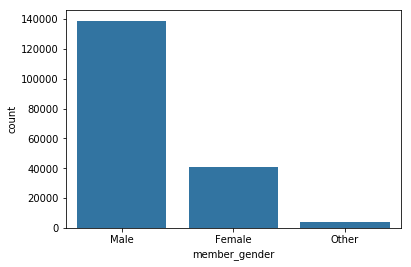

In [72]:
#count of the categories in member gender
count(Bike_Share, 'member_gender',Bike_Share['member_gender'].value_counts().index)

The above plot shows that more males patronize the bike share program the most followed by females and finally other.

I will check the counts of the user_type and the Bike share for all trip using a pie chart

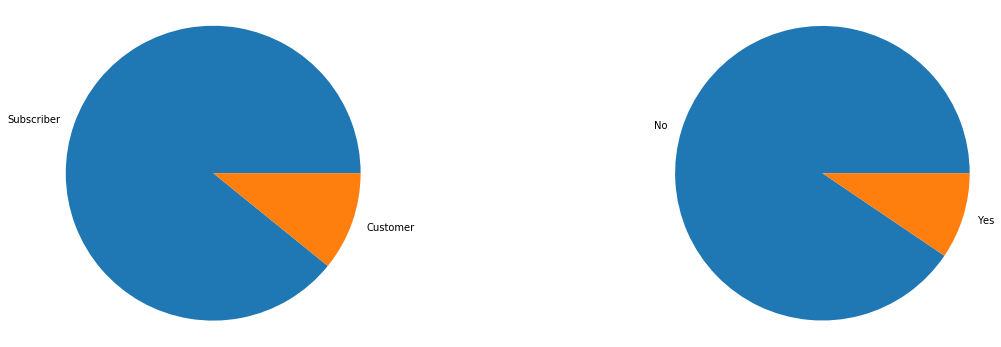

In [73]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sorted_counts = Bike_Share['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index)
plt.axis('square');

plt.subplot(1,2,2)
sorted_count = Bike_Share['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_count, labels = sorted_count.index)
plt.axis('square');

Of all those who patronize the bike sharing system, the majority are subscribers and just a few relative to the subscribers are Customers and also the majortity of the users of the bike sharing system do have bike share for all trip

I will now plot the counts of both start_day and the start_seasons  

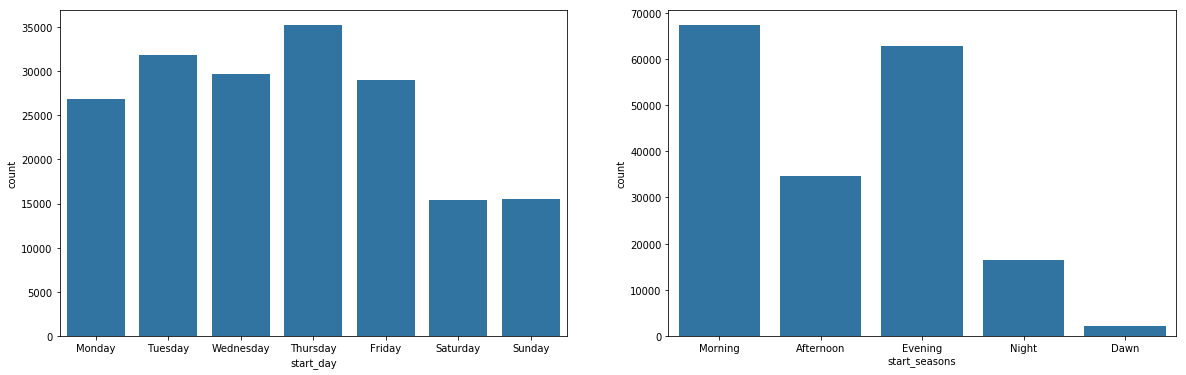

In [75]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count(Bike_Share,'start_day',day_order)

plt.subplot(1,2,2)
time_order = ['Morning','Afternoon','Evening','Night','Dawn']
count(Bike_Share,'start_seasons',time_order)

For the plots above, it shows that the Bikes system users dont really patronize the system on weekends and also at dawn followed by night. Most users patronize the system the most on Thursdays, followed by Tuesdays,Wednesdays,Fridays, and Mondays. They mostly use the system in the morning and in the evenings

I will now also plot the counts of both end_day and the end_seasons 

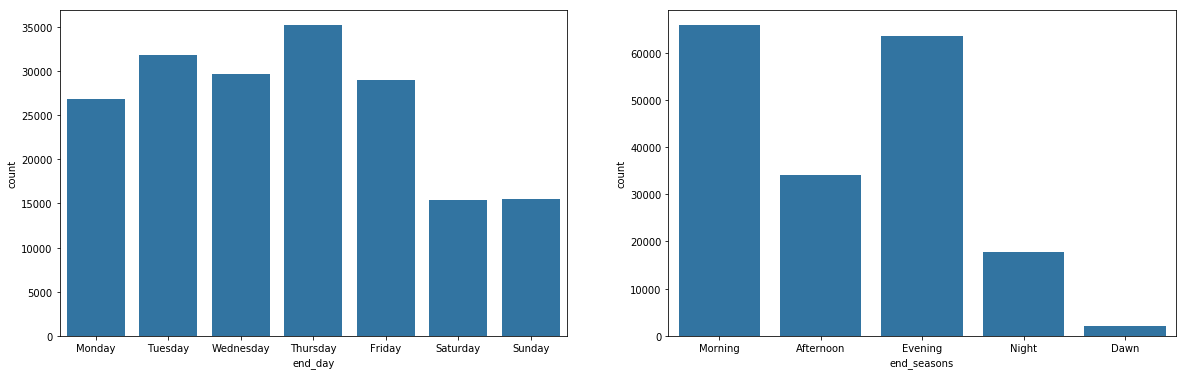

In [76]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
count(Bike_Share,'end_day',day_order)

plt.subplot(1,2,2)
count(Bike_Share,'end_seasons',time_order)

The plots from the start_day and start_seasons are no different from their respective end_day and end_seasons plots. Which implies that most of the trips ended in the same seasons of the day, which implies that the trips were short.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since the variables of interests are all categorical, a count plot on them suggusted the category with the most to the least counts. There was no need to perform any transformations to the variables of interest.




## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

I will to know how the count of the member gender is related to the user type.

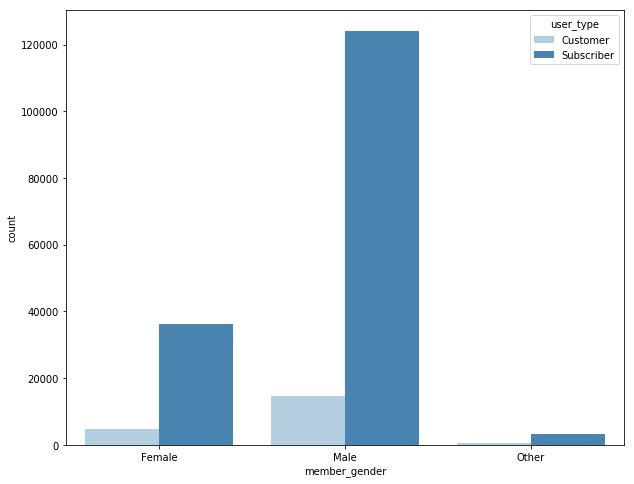

In [33]:
plt.figure(figsize=[10,8])
sb.countplot(data = Bike_Share, x = 'member_gender', hue = 'user_type', palette = 'Blues');


The subscribers in all three gender classes are more than the number of customers from all three gender classes. This may be due to the fact that the subscribers were more than the customers. 

I will now check the relationship between the start_day and start_seasons with their respective end times

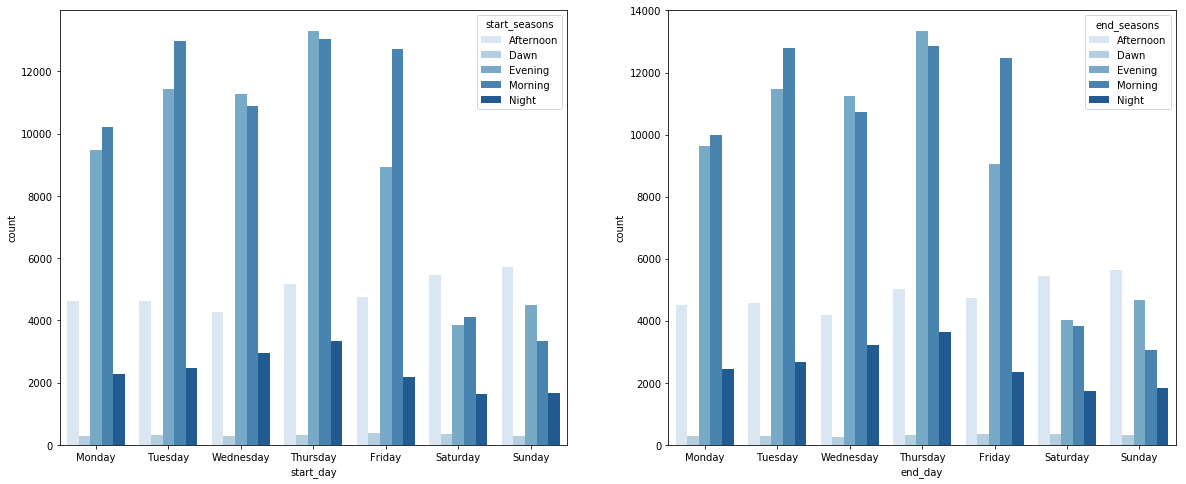

In [77]:
plt.figure(figsize = [20, 8])

# subplot 1: start_day vs start_seasons
plt.subplot(1, 2, 1)
sb.countplot(data = Bike_Share, x = 'start_day', hue = 'start_seasons', palette = 'Blues',order=day_order)

# subplot 2: end_day vs. end_seasons
plt.subplot(1, 2, 2)
sb.countplot(data = Bike_Share, x = 'end_day', hue = 'end_seasons', palette = 'Blues',order=day_order);




Across the days on the graph, mornings and evenings are the most frequent seasons whem trips both ended and started. Its quite a coinncidence that both start trips and end trips took place the most on Thursdays and generally on weekdays. However weekends seem to show the least trips for both start and end trips

I will continue to check the start days and start seasons against the mean duration in seconds

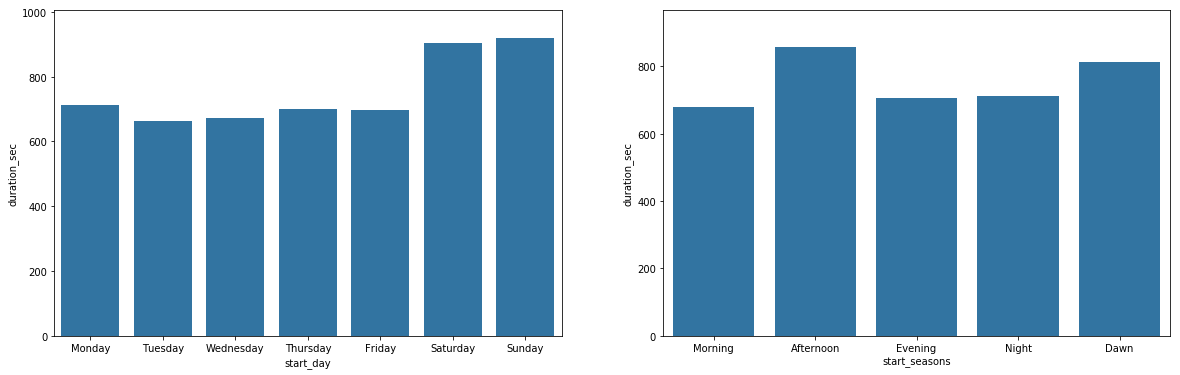

In [78]:
plt.figure(figsize = [20,6])
# subplot 1: start_day vs duration_sec
plt.subplot(1,2,1)
sb.barplot(data=Bike_Share,x='start_day', y='duration_sec', color = base_color, errwidth =0,order=day_order)


# subplot 2: start_seasons vs duration_sec
plt.subplot(1,2,2)
sb.barplot(data=Bike_Share,x='start_seasons', y='duration_sec', color = base_color, errwidth =0,order=time_order);

The trips made on weekends have the highest mean distance covered as compared to those made on weekdays. The mean distances in seconds covered during the seasons of the day is highest in the afternoon and least in the morning. However, the differences in the means are not quite significant between the afternoon and morning.

I will continue to check both member gender against mean duration(secs) and user type against the mean durationn(secs)

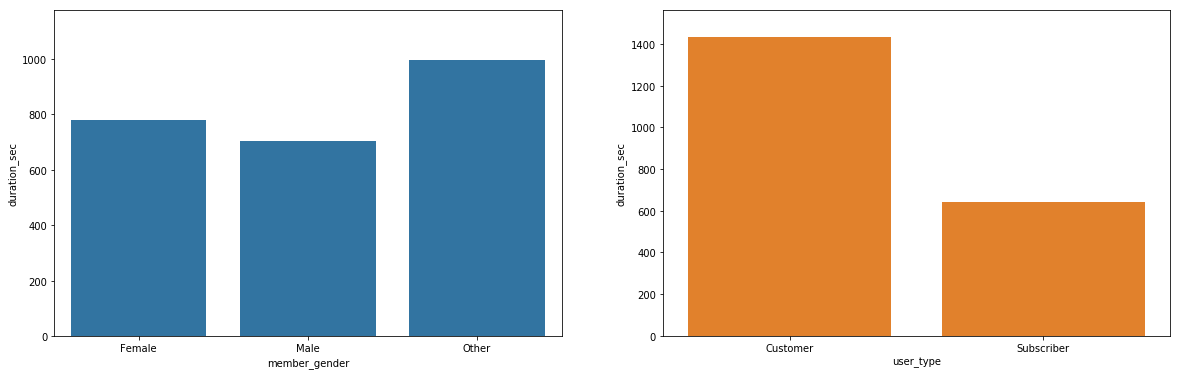

In [36]:

plt.figure(figsize = [20,6])
# subplot 1: member_gender vs duration_sec
plt.subplot(1,2,1)
sb.barplot(data=Bike_Share,x='member_gender', y='duration_sec', color = base_color, errwidth =0)

# subplot 2: user_type vs duration_sec
plt.subplot(1,2,2)
sb.barplot(data=Bike_Share,x='user_type', y='duration_sec', color = sb.color_palette()[1], errwidth =0);

From the plot, the member gennder 'Other' has the greatest mean distance covered followed by female and then finally male. For the user_type, customers have the greatest mean distance covered compared to subscribers.
in both graphs, the categories with the least user counts have the highest mean distance covered.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The subscribers in all three gender classes are more than the number of customers from all three gender classes. This may be due to the fact that the subscribers were more than the customers. Most trips took place on weekdays mostly thurdays and the these trips took place mostly in the morning and evening.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to know that though the least count of trips occured on weekends, the highest mean distance covered was made on weekends. It was also surprising to know that the time of the day with the second highest mean distance covered was at dawn.

## Multivariate Exploration

I will begin by checking the relationship between user_type,member_gender, and duration_sec

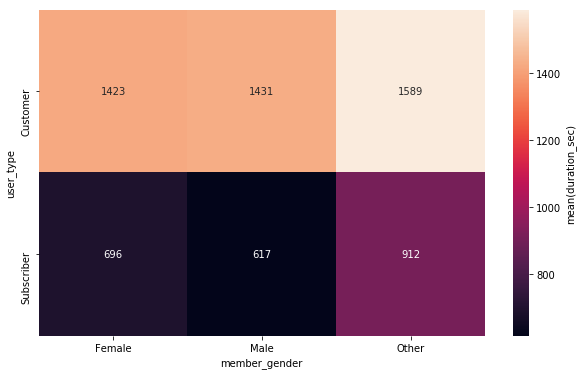

In [37]:
cat_means = Bike_Share.groupby(['member_gender','user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'mean_distance')
cat_means = cat_means.pivot(index = 'user_type', columns ='member_gender', values ='mean_distance')
plt.figure(figsize=[10,6])
sb.heatmap(cat_means, annot =True, fmt = '.0f', cbar_kws={'label':'mean(duration_sec)'});

From the heatmap, users with gender type 'other' who are customers covered the highest mean distance while male users who are subscribers  covered the least mean distance(secs). It could also be read from the map that customers  have covered more mean distance than subscribers.

I will continue by checking the relationship between start_day, start_seasons, and duration_sec

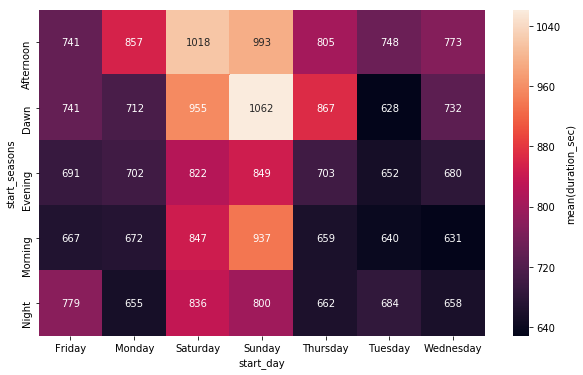

In [38]:
cat_meanss = Bike_Share.groupby(['start_day','start_seasons']).mean()['duration_sec']
cat_meanss = cat_meanss.reset_index(name = 'mean_distance')
cat_meanss = cat_meanss.pivot(index = 'start_seasons', columns ='start_day', values ='mean_distance')
plt.figure(figsize=[10,6])
sb.heatmap(cat_meanss, annot =True, fmt = '.0f', cbar_kws={'label':'mean(duration_sec)'});

From the heatmap above, The the highest mean distance was covered on the Dawn of a Sundays and the least mean distannce was covered on the Dawn of Tuesdays.

I will finally check the relationship between the start_day, member_gender, and duration_sec

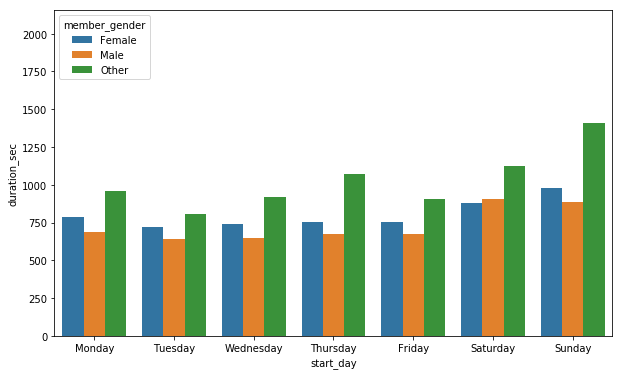

In [79]:
plt.figure(figsize=[10,6])
sb.barplot(data=Bike_Share, x='start_day', y='duration_sec',hue = 'member_gender',errwidth= False,order=day_order)

Not only does the Other gender type have the highest overall mean distance covered but it also has the highest distance covered in all the respective start days. This is followed by females and finally males. It is only in one case where the mean distance travelled by males exceeded that of females and that was on saturdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Male users who were subscribers had the greatest count. However they have the lowest mean distance covered in seconds. Other users who were customers had the least count by the greatest mean distance covered. The lower mean distance covered in the group with the highest count could be due to the greater number of exposure units.



## Conclusions
> The Bike Share System is used more by males, followed by females and finally the other gender type. Of all the users who patronize the system, the majority are subscribers and the remaining few are customers. The system is patronized more often on weekdays and the least on weekends. The times of the day when the system is patronized the most are morning and evenings and the least at dawns. The mean distance covered by each the males who happen to be the majority is the least and the "other" gender type has the greatest mean distance travelled in seconds
